In [2]:

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.utils.data as data
import torch.nn.functional as F
import torch.multiprocessing as mp

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid
from torchvision.models import *

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import PIL
from PIL import Image
%matplotlib inline

# MODELS = {"resnet18":resnet18,"resnet34":resnet34,"resnet50":resnet50,
#           "resnet101":resnet101,"resnet152":resnet152,
#           "inception_v3":inception_v3,
#           "densenet161":densenet161,"densenet121":densenet121,"densenet169":densenet169,"densenet201":densenet201,
#           "alexnet":alexnet,"vgg11":vgg11,"vgg11_bn":vgg11_bn,"vgg13":vgg13,
#           "vgg13_bn":vgg13_bn,"vgg16":vgg16,"vgg16_bn":vgg16_bn,"vgg19":vgg19,
#           "vgg19_bn":vgg19_bn}
#Model =densenet161(pretrained =True)
#print(Model)

MODELS = {"resnet18":resnet18,"resnet152":resnet152,"resnet50":resnet50,"inception_v3":inception_v3,"densenet161":densenet161,"densenet201":densenet201,"alexnet":alexnet,"vgg16_bn":vgg16_bn,"vgg19_bn":vgg19_bn}

#查看模型中的权参
#params=list(model.parameters())
#查看有多少个子module(layer): len(list(net.children()))
#打印网络结构:
#print(model)
#model.parameters()[0]/[1]
#获取含参的变量的名称及值
#params=model.state_dict()
#key为网络各module的名字,Value为key对应的weight,如key为a,a可能是fc.weight或fc.bias等变量,则有:
#对weight:params[a].grad.size(),params[a].grad.data
#对bias:,params[a].grad.size(),params[a].grad.data
#for key,value in params.items(): 
#    print(key)
#print(params['fc.weight'])
#print(params['fc.bias']) 
#获取Module的名称,即每个module的对象,
#print(list(model.children()))
#print(list(model.children())[-1])
#print(model)
#print(list(model.__dict__['_modules'].keys())[-1])
for key,MODEL in MODELS.items():
    model = MODEL(pretrained =True)
    print(key,"对应最后一层名称:",list(model.__dict__['_modules'].keys())[-1])


resnet18 对应最后一层名称: fc
resnet152 对应最后一层名称: fc
resnet50 对应最后一层名称: fc
inception_v3 对应最后一层名称: fc
densenet161 对应最后一层名称: classifier
densenet201 对应最后一层名称: classifier
alexnet 对应最后一层名称: classifier
vgg16_bn 对应最后一层名称: classifier
vgg19_bn 对应最后一层名称: classifier


In [18]:
u = np.array([[1,2],[3,4]])

a = np.array([[0.82698,0.80478,0.84779,2.66272,-1.32995],
[-1.99148,3.02052,-0.48165,1.33842,1.32278]])
o=F.softmax(Variable(torch.Tensor(a)),dim=1)

print(o)

def softmax(x):
    """
    Compute the softmax function for each row of the input x.

    Arguments:
    x -- A N dimensional vector or M x N dimensional numpy matrix.

    Return:
    x -- You are allowed to modify x in-place
    """
    orig_shape = x.shape

    if len(x.shape) > 1:
        # Matrix
        exp_minmax = lambda x: np.exp(x - np.max(x))
        denom = lambda x: 1.0 / np.sum(x)
        x = np.apply_along_axis(exp_minmax,1,x)
        denominator = np.apply_along_axis(denom,1,x) 
        
        if len(denominator.shape) == 1:
            denominator = denominator.reshape((denominator.shape[0],1))
        
        x = x * denominator
    else:
        # Vector
        x_max = np.max(x)
        x = x - x_max
        numerator = np.exp(x)
        denominator =  1.0 / np.sum(numerator)
        x = numerator.dot(denominator)
    
    assert x.shape == orig_shape
    return x
m = u.tolist()
for i in u:
    print(i)

softmax(a)

Variable containing:
 0.1066  0.1042  0.1088  0.6681  0.0123
 0.0047  0.7113  0.0214  0.1323  0.1302
[torch.FloatTensor of size 2x5]

[1 2]
[3 4]


array([[ 0.10655841,  0.10421888,  0.10879912,  0.66809694,  0.01232665],
       [ 0.00473556,  0.71130365,  0.02143295,  0.13229039,  0.13023746]])

In [2]:

#注意传入图像的值应在0-1之间，plt显示图像应为HWC格式
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    plt.show()
#用法：
#imglist = [img, img, img, img.clone().fill_(0)]
#show(make_grid(imglist, padding=20))

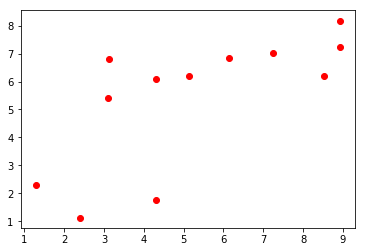

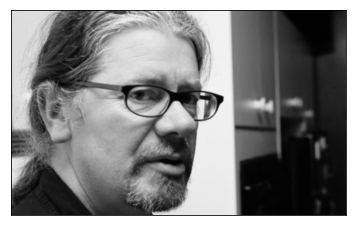

True


In [4]:
x = np.array([1.3,2.4,3.1,4.32,5.13,6.15,7.25,8.92,8.92,3.12,4.32,8.52], dtype=np.float32)
y = np.array([2.3,1.13,5.4,6.1,6.2,6.85,7.03,8.18,7.25,6.82,1.75,6.2], dtype=np.float32)
plt.scatter(x,y,color="red")
plt.show()

img = cv2.imread('../test.jpg',0) #若显示彩色，需要做通道转换
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()
print torch.cuda.is_available()

In [ ]:
img_path = "../test.jpg"  
  
# transforms.ToTensor()  
transform1 = transforms.Compose([  
    transforms.ToTensor(), # range [0, 255] -> [0.0,1.0]  
    ]  
)  
  
##numpy.ndarray  
img = cv2.imread(img_path)# 读取图像  
img1 = transform1(img) # 归一化到 [0.0,1.0]  
print("img1 = ",img1)  
# 转化为numpy.ndarray并显示  
img_1 = img1.numpy()*255  
img_1 = img_1.astype('uint8')  
img_1 = np.transpose(img_1, (1,2,0))  
cv2.imshow('img_1', img_1)  
cv2.waitKey()  
  
##PIL  
img = Image.open(img_path).convert('RGB') # 读取图像  
img2 = transform1(img) # 归一化到 [0.0,1.0]  
print("img2 = ",img2)  
#转化为PILImage并显示  
img_2 = transforms.ToPILImage()(img2).convert('RGB')  
print("img_2 = ",img_2)  
img_2.show()   

In [ ]:
for i, data in enumerate(imgLoader, 0):
    print(data[i][0])
    # opencv
    img2 = data[i][0].numpy()*255
    img2 = img2.astype('uint8')
    img2 = np.transpose(img2, (1,2,0))
    img2=img2[:,:,::-1]#RGB->BGR
    cv2.imshow('img2', img2)
    cv2.waitKey()
    break